# <center>L2 Computational Physics</center>

## <center>Week 3: Differential Equations I</center>

In [2]:
# usual packages to import
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

In this notebook, you will generate and plot the decay curve for Iodine-133 analytically and numerically. $^{133}\textrm{I}$ has a half life $t_{1/2}$ of 20.8 hours. This means that half of the nuclei will have decayed after time $t_{1/2}$. Derive the mean lifetime $\tau$ from that information.

In [3]:
# define a function to calculate the mean lifetime from the half life
def meanLifetime(halfLife):
    return halfLife/numpy.log(2)
T_HALF = 20.8
TAU = meanLifetime(T_HALF)


Check your average lifetime:

In [4]:
# this test is worth 1 mark
assert numpy.isclose(TAU, 30.0080568505)         

### The Decay Equation

Implement the function `f_rad` such that the differential equation 

$$ \frac{dN}{dt} = f_{rad}(N,t)$$

describes the radioactive decay process.

- *Your function should return values using hours as the time unit.*
- *The function should use the constant* `TAU`.

In [5]:
def f_rad(N, t):
    return -N/TAU

Make sure your function works:

In [9]:
# this test cell is worth 1 mark
assert numpy.isclose(f_rad(1000, 0), -33.324383681)           

Solve this first order, ordinary differential equation analytically. Implement this function below, naming it `analytic`. The function should take an initial number of atoms `N0` at time `t=0`, and a time argument. The function should return nuclei count at the time argument. Make sure the function also works for numpy arrays.

In [10]:
def analytic(N0, t):
    return N0*numpy.exp(-t/TAU)

Check your answer for a single time:

In [11]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, 41.6), 250.0)           

In [12]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, numpy.arange(0, 60, 6)), 
                     [1000.        ,  818.77471839,  670.39203948,  548.90005334,
                       449.4254866 ,  367.97822623,  301.29126855,  246.68967356,
                       201.983268  ,  165.37879338]).all()


## Numerically Solving the ODE

We now wish to solve our differential equation numerically. We shall do this using Euler's and RK4 methods.

### Euler's Method

Create a function which takes as its arguments the initial number of atoms, `n0`, the initial time `t0`, the time step, `dt`, and the number of steps to perform, `n_steps`.  This function should return an array of the number of counts at each time step using Euler's method. This array should contain the initial and final values, so the array length should be `n_steps+1` 

In [13]:
def solve_euler(f, n0, t0, dt, n_steps):
    N=[]
    N.append(n0)
    t=t0
    for i in range (0,n_steps):
        N.append(N[i] +(f(N[i],t)*dt))
        t=t+dt
    return N


Try your solution:

In [14]:
# this test is worth 1 mark
assert len(solve_euler(f_rad, 1000, 0, 1, 17)) == 18

In [15]:
# this test is worth 2 marks
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 1), [1000.,  800.05369792]).all()

In [16]:
# this test is worth 2 mark
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 10), [1000.        ,  800.05369792,  640.08591955,  512.10310692,
                                                409.7099844 ,  327.7899881 ,  262.24959212,  209.81375595,
                                                167.86227132,  134.29883091,  107.4462763 ]).all()

### RK 4 method

Implement the RK4 method in the `solve_RK4` function. The arguments are the same as for `solve_euler`.

In [17]:
def solve_RK4(f, n0, t0, dt, nsteps):
    N=[]
    N.append(n0)
    t=t0
    k=0
    for i in range (0,nsteps):
        k1=f(N[i],t)
        t=t+(dt/2)
        k2=f(N[i]+k1*dt/2,t)
        k3=f(N[i]+(k2*dt/2),t)
        t=t+(dt/2)
        k4=f(N[i]+k3*dt,t)
        k= (k1+2*k2+2*k3+k4)/6
        N.append(N[i] + k*dt)
       
    return N


In [18]:
# This checks that we return an array of the right length
# this test is worth 1 mark
assert len(solve_RK4(f_rad, 1000, 0, 1, 17)) == 18

In [19]:
# This checks that a single step is working
# this test is worth 2 mark
assert numpy.isclose(solve_RK4(f_rad, 1000,0, 6, 1), [1000.,  818.7773]).all()

In [20]:
# This checks multiple steps
# this test is worth 2 marks
assert numpy.isclose(solve_RK4(f_rad, 1000, 0, 6, 10), [
    1000.,
    818.77729521,  
    670.39625915,  
    548.90523578,
    449.43114428,  
    367.9840167,  
    301.29695787,  
    246.69510822, 
    201.98835345,  
    165.3834777,  
    135.41223655]).all()

## Plotting task

**Task 1: **

Create a plot to show that the RK4 method has an error that scales better with the number of steps than the Euler method. (click on the "+" button to create new cells.)       [task worth 5 marks]


<Figure size 432x288 with 0 Axes>

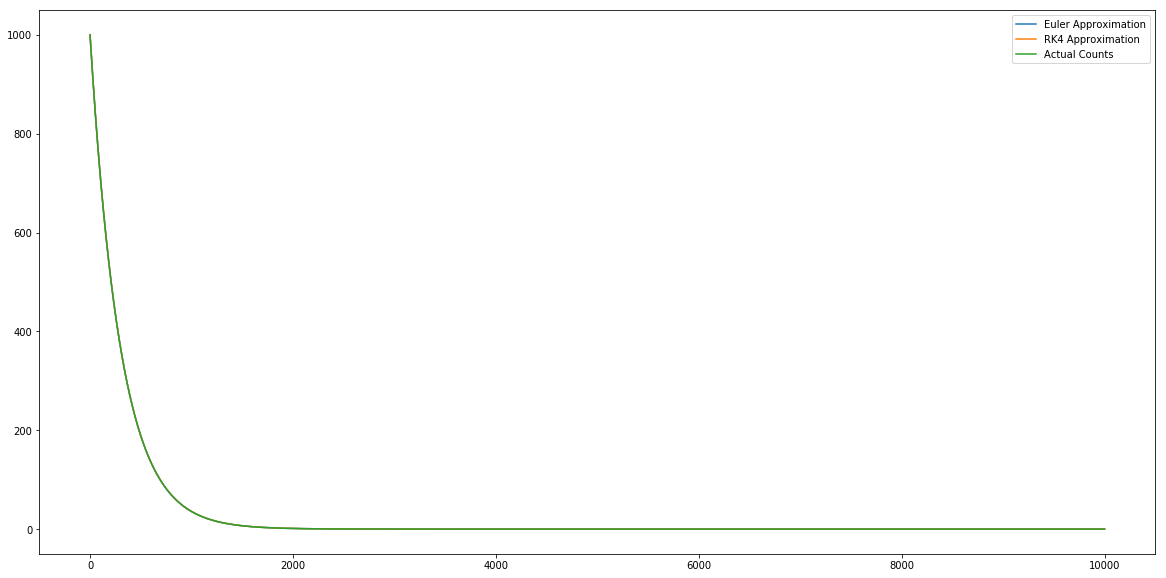

<Figure size 432x288 with 0 Axes>

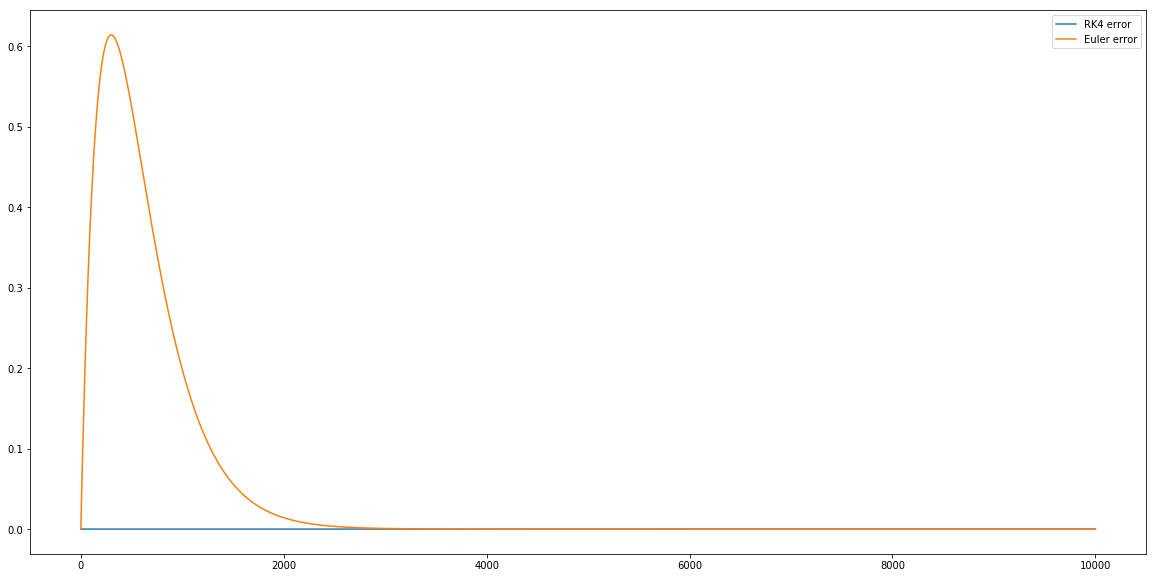

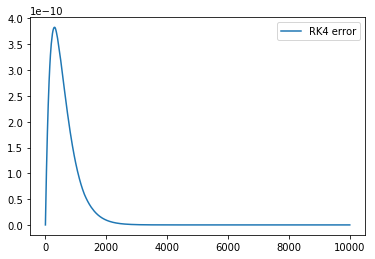

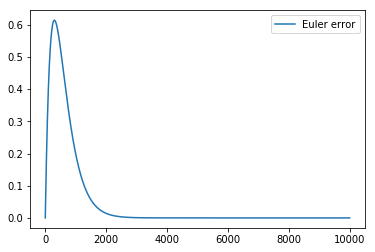

In [21]:
n0, t0, dt, nsteps = 1000, 0, 0.1, 10000
realr=[]
#print(solve_RK4(f_rad, n0, t0, dt, nsteps))
t=t0
for i in range (0,nsteps+1):
    realr.append(n0*numpy.exp(-t/TAU))
    t=t+dt
#print(realr)
numpy.arange(nsteps+1)

def RK4error(f, n0, t0, dt, nsteps):
    errr=[]
    t=t0
    errr.append(n0-n0*numpy.exp(-t/TAU))
    N=[]
    N.append(n0)
    t=t0
    k=0
    for i in range (0,nsteps):
        
        k1=f(N[i],t)
        t=t+(dt/2)
        k2=f(N[i]+k1*dt/2,t)
        k3=f(N[i]+(k2*dt/2),t)
        t=t+(dt/2)
        k4=f(N[i]+k3*dt,t)
        k= (k1+2*k2+2*k3+k4)/6
        N.append(N[i]+k*dt)
        errr.append((N[i]+k*dt-n0*numpy.exp(-t/TAU)))
    return errr
#print(RK4error(f_rad, n0, t0, dt, nsteps))
#/(N[i]+k*dt)
def eulererror(f_rad, n0, t0, dt, nsteps):
    erre=[]
    t=t0
    erre.append(n0-n0*numpy.exp(-t/TAU))
    N=[]
    N.append(n0)
    for i in range (0,nsteps):
        N.append(N[i] +(f_rad(N[i],t)*dt))
        t=t+dt
        erre.append((((N[i]+(f_rad(N[i],t)*dt)-n0*numpy.exp(-t/TAU)))**2)**0.5)
    return erre               
#print(eulererror(f_rad, n0, t0, dt, nsteps))

#print(solve_euler(f_rad, n0, t0, dt, nsteps))
#/(N[i]+f_rad(N[i],t)*dt)

plt.figure()
plt.figure(figsize=(20,10))
plt.plot(numpy.arange(nsteps+1),solve_euler(f_rad, n0, t0, dt, nsteps),label="Euler Approximation")
plt.plot(numpy.arange(nsteps+1),solve_RK4(f_rad, n0, t0, dt, nsteps),label="RK4 Approximation")
plt.plot(numpy.arange(nsteps+1),realr,label="Actual Counts")
plt.legend()
plt.figure()
plt.figure(figsize=(20,10))
plt.plot(numpy.arange(nsteps+1),RK4error(f_rad, n0, t0, dt, nsteps), label = "RK4 error")
plt.plot(numpy.arange(nsteps+1),eulererror(f_rad, n0, t0, dt, nsteps), label = "Euler error")
plt.legend()
plt.figure()
plt.plot(numpy.arange(nsteps+1),RK4error(f_rad, n0, t0, dt, nsteps), label = "RK4 error")
plt.legend()
plt.figure()
plt.plot(numpy.arange(nsteps+1),eulererror(f_rad, n0, t0, dt, nsteps), label = "Euler error")
plt.legend()

In [22]:
n0, t0, dt, nsteps = 1000, 0, 0.1, 100
realr=[]
n_steps=[]
#print(solve_RK4(f_rad, n0, t0, dt, nsteps))
t=t0
for i in range (0,nsteps+1):
    realr.append(n0*numpy.exp(-t/TAU))
    t=t+dt 
#print(realr)
numpy.arange(nsteps+1) 
realr= 

def RK4error(f, n0, t0, dt, nsteps):
    errr=[]
    t=t0
    errr.append(n0-n0*numpy.exp(-t/TAU))
    N=[]
    N.append(n0)
    t=t0
    k=0
    for i in range (0,nsteps):
        for i in range (0,n_steps):
            k1=f(N[i],t)
            t=t+(dt/(2*n_steps))
            k2=f(N[i]+k1*dt/(2*n_steps),t)
            k3=f(N[i]+(k2*dt/(2*n_steps)),t)
            t=t+(dt/(2*n_steps))
            k4=f(N[i]+k3*(dt/(2*n_steps)),t)
            k= (k1+2*k2+2*k3+k4)/6
            N.append(N[i]+k*dt/(2*n_steps))
            errr.append((N[i]-n0*numpy.exp(-t/TAU)))
    return errr
#print(RK4error(f_rad, n0, t0, dt, nsteps))
#/(N[i]+k*dt)
def eulererror(f_rad, n0, t0, dt, nsteps):
    erre=[]
    t=t0
    erre.append(n0-n0*numpy.exp(-t/TAU))
    N=[]
    N.append(n0)
    for i in range (0,nsteps):
        for i in range (0,n_steps):
            N.append(N[i] +(f_rad(N[i],t)*(dt/n_steps)))
            t=t+(dt/n_steps)
            erre.append((((N[i]+(f_rad(N[i],t)*dt)-n0*numpy.exp(-t/TAU)))**2)**0.5)
    return erre               
#print(eulererror(f_rad, n0, t0, dt, nsteps))

#print(solve_euler(f_rad, n0, t0, dt, nsteps))
#/(N[i]+f_rad(N[i],t)*dt)

#plt.figure()
#plt.figure(figsize=(20,10))
#plt.plot(numpy.arange(n_steps),solve_euler(f_rad, n0, t0, dt, nsteps),label="Euler Approximation")
#plt.plot(numpy.arange(n_steps),solve_RK4(f_rad, n0, t0, dt, nsteps),label="RK4 Approximation")
#plt.plot(numpy.arange(n_steps),realr,label="Actual Counts")
#plt.legend()
#plt.figure()
plt.figure(figsize=(20,10))
plt.plot(numpy.arange(n_steps),RK4error(f_rad, n0, t0, dt, nsteps), label = "RK4 error")
plt.plot(numpy.arange(n_steps),eulererror(f_rad, n0, t0, dt, nsteps), label = "Euler error")
plt.legend()
plt.figure()
plt.plot(numpy.arange(n_steps),RK4error(f_rad, n0, t0, dt, nsteps), label = "RK4 error")
plt.legend()
plt.figure()
plt.plot(numpy.arange(n_steps),eulererror(f_rad, n0, t0, dt, nsteps), label = "Euler error")
plt.legend()

SyntaxError: invalid syntax (<ipython-input-22-b3519272bf0f>, line 11)

In [25]:
dt=0.1
n0=1000
real= n0*numpy.exp(-10/TAU)

print(real)
def solve_euler2(f, n0, t0, dt, n_steps):
    w=0
    N=n0
    t=t0
    for i in range (0,n_steps):
        N=N +(f(N,t)*(100*(dt/n_steps)))
        t=t+(100*dt/n_steps)
    return N



def eulererr():
    erre=[]
    n_steps=1
    for i in range (0,1000):
        erre.append(real-solve_euler2(f_rad, 1000, 0, 0.1, n_steps))
        n_steps= n_steps + 1
    return erre
    
        
   
 
        
plt.plot(numpy.arange(0,1000,eulererr()))

716.5954405062778


TypeError: unsupported operand type(s) for /: 'int' and 'list'